<a href="https://colab.research.google.com/github/dhruvpathak1/machine_learning/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

data = pd.read_csv("https://raw.githubusercontent.com/dhruvpathak1/machine_learning/main/fish_weighs.csv")

In [2]:
data.shape

(159, 7)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X = data[['Length1']]
Y = data['Weight']
# fit the linear model using MIN
lm.fit(X,Y)
# training data is passed to fit method

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
Yhat=lm.predict(X)
Yhat[0:10]

array([298.40312322, 324.63685434, 321.35763795, 400.0588313 ,
       406.61726408, 416.45491325, 416.45491325, 442.68864436,
       442.68864436, 472.20159187])

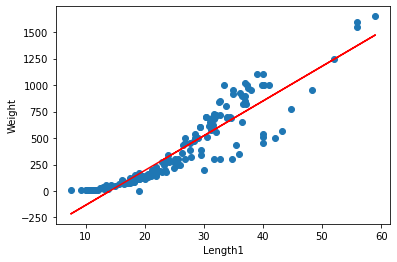

In [10]:
# plot regression model
plt.scatter(data['Length1'],Y)
# X,Y
plt.plot(data['Length1'],Yhat,color='red')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()

In [12]:
print(lm.intercept_)
print(lm.coef_)

-462.37507915831395
[32.7921639]


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation
rmse = mean_squared_error(Y, Yhat)
r2 = r2_score(Y, Yhat)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  20562.256518291095
R2 score:  0.8385279468768119


In [14]:
X=X.iloc[:,0] 

In [15]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

17.75678189654591 -10.92790399022634


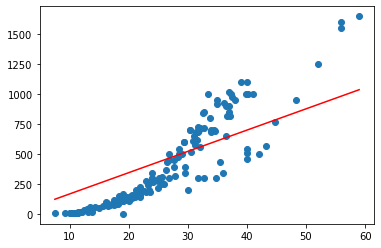

In [16]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [17]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

In [18]:
X = data[['Length1']][0:400]
Y = data['Weight'][0:400]
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.4, random_state=42)
model_lasso=Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
predictions= model_lasso.predict(x_test)
print("R2 Lasso", r2_score(y_test, predictions))

R2 Lasso 0.8010117994174193


In [19]:
model_ridge=Ridge(alpha=0.01)
model_ridge.fit(x_train, y_train)
predictions= model_ridge.predict(x_test)
print("R2 ridge", r2_score(y_test, predictions))

R2 ridge 0.8010115229315475
